# Modeling

In churn prediction, the goal is to identify customers at risk of leaving, not simply to maximize overall accuracy. Due to class imbalance and business impact, the following metrics are more informative.

Recall (Churn = 1) measures the proportion of actual churned customers correctly identified. High recall is critical because missing a churner results in a lost customer with no opportunity for intervention. In practice, it is often preferable to accept some false positives rather than miss high-risk customers.

ROC–AUC evaluates the model’s ability to distinguish between churned and retained customers across all classification thresholds. A higher ROC–AUC indicates stronger ranking capability and is useful for comparing models independent of a fixed decision threshold.

Precision–Recall Tradeoff reflects the balance between identifying true churners and limiting false positives. The optimal tradeoff depends on business costs, such as the expense of retention actions versus the cost of customer loss.

Accuracy alone is insufficient in churn problems because class imbalance can produce deceptively high accuracy while failing to detect churners. As a result, accuracy does not reliably reflect churn prediction performance.

## Logistic Regression

In [ ]:
log_reg = LogisticRegression(
    max_iter=5,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train_smote, y_train_smote)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC_log_reg:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1035
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.72      1409

ROC-AUC_log_reg: 0.8044744116355369


## RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=4,
    min_samples_split=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_smote, y_train_smote)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC_RandomForestClassifier:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409

ROC-AUC_RandomForestClassifier: 0.8317368053940943


## XGBClassifier

In [ ]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_smote, y_train_smote)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC_xgb:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1035
           1       0.48      0.82      0.60       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.73      1409

ROC-AUC_xgb: 0.8356984163889535


In [ ]:
def plot_confusion_matrices(models, X_test, y_test):
    """
    Plots confusion matrices for multiple models.
    models: dict -> {'Model Name': trained_model}
    """
    n_models = len(models)
    fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 5))

    if n_models == 1:
        axes = [axes]

    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            ax=ax
        )

        ax.set_title(f'{name} - Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_roc_curves(models, X_test, y_test):
    """
    Plots ROC curves for multiple models on the same graph.
    """
    plt.figure(figsize=(17, 6))

    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()


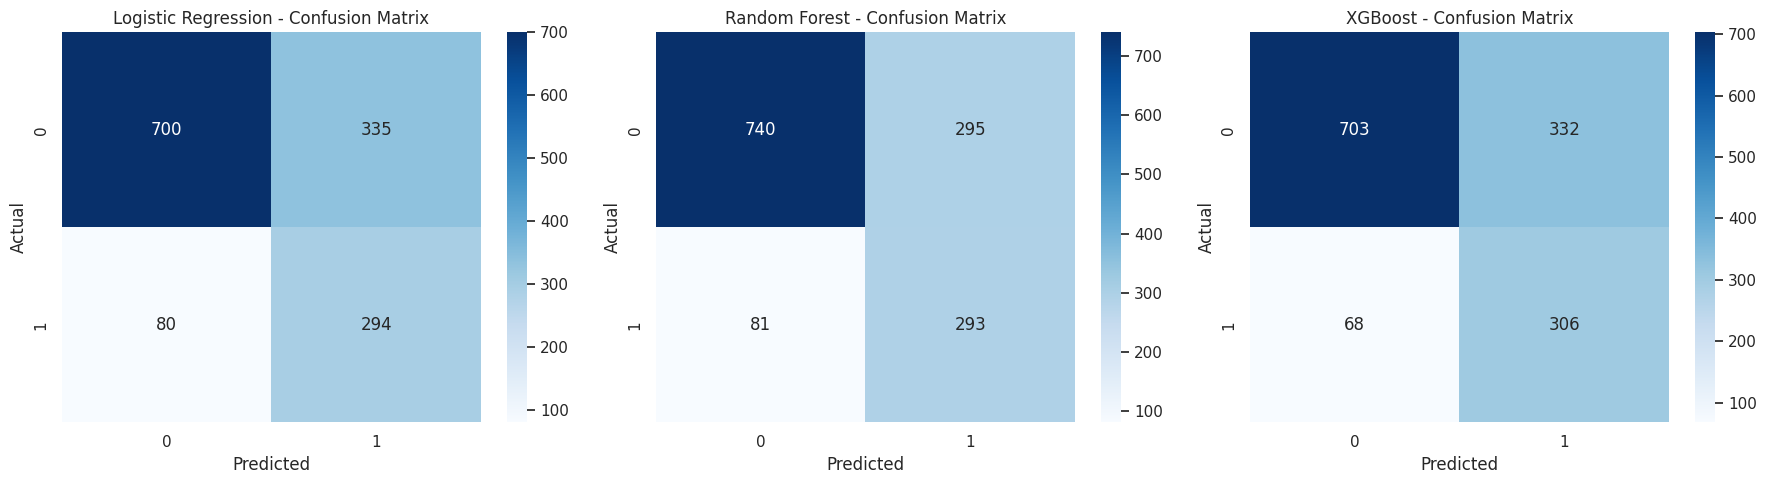

In [ ]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'XGBoost': xgb
}

plot_confusion_matrices(models, X_test, y_test)


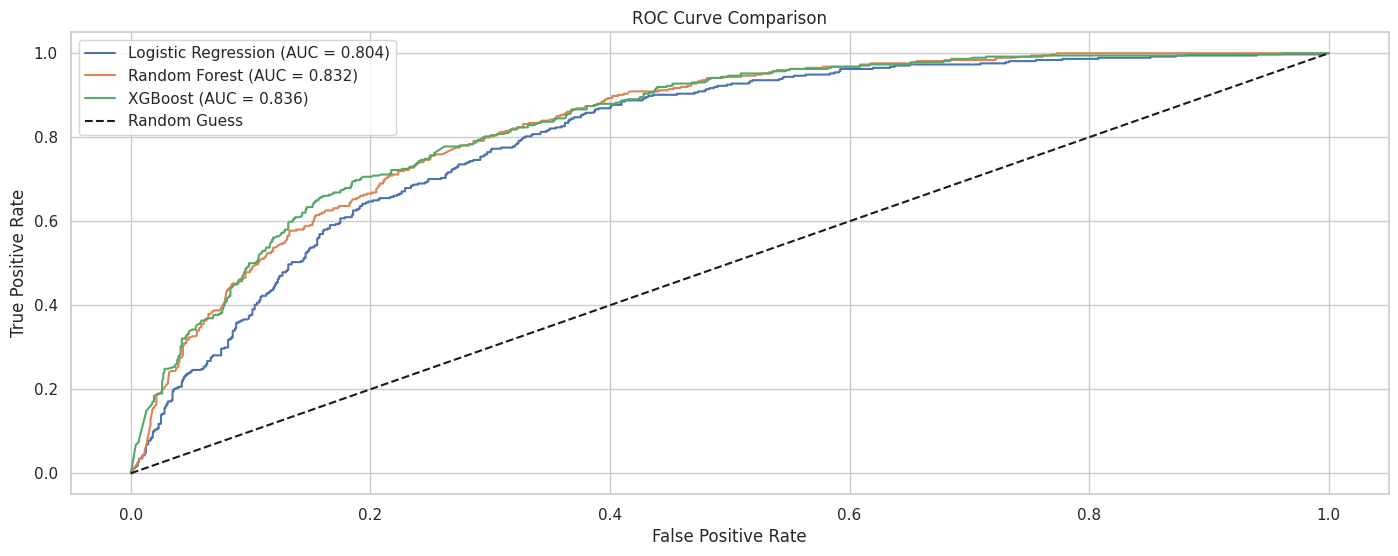

In [ ]:
plot_roc_curves(models, X_test, y_test)


## Model Comparison and Business Recommendation

All three models demonstrate strong ability to identify churners, with recall for churned customers (Class 1) close to or above 0.78, which is critical for retention-focused use cases.

Logistic Regression provides a solid baseline with a churn recall of 0.79 and ROC–AUC of 0.80. However, its lower precision for churners results in more false positives, increasing unnecessary retention costs.

Random Forest improves overall performance, achieving a higher ROC–AUC of 0.83 and better balance between precision (0.50) and recall (0.78) for churners. This leads to more efficient targeting of retention efforts with fewer wasted interventions.

XGBoost delivers the highest ROC–AUC (0.84) and the highest churn recall (0.82), indicating the strongest ability to rank high-risk customers correctly. While precision remains comparable to other models, the improved recall ensures fewer churners are missed.

> XGBoost is the preferred model for business deployment, as it maximizes churner detection while providing the best overall ranking performance. This enables earlier and more accurate identification of high-risk customers, supporting targeted retention strategies and improved revenue protection.